Caleb - Looking at salaries of baseball players over time



In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [79]:
salary = pd.read_csv('Salaries.csv')
batting = pd.read_csv('Batting.csv')
# batting_salary = pd.merge(salary, batting, on='playerID', suffixes=('_salary', '_batting'))
batting_salary = pd.merge(salary, batting, on=['playerID', 'yearID', 'teamID', 'lgID'], suffixes=('_salary', '_batting'))
batting_salary.head()


,yearID,teamID,lgID,playerID,salary,stint,G,AB,R,H,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1985,ATL,NL,barkele01,870000,1,20,17,0,0,...,0.0,0.0,1.0,0,7.0,0.0,0.0,0.0,0.0,0.0
1,1985,ATL,NL,bedrost01,550000,1,37,64,3,5,...,1.0,0.0,0.0,1,22.0,0.0,0.0,6.0,0.0,0.0
2,1985,ATL,NL,benedbr01,545000,1,70,208,12,42,...,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0
3,1985,ATL,NL,campri01,633333,1,66,13,1,3,...,2.0,0.0,0.0,1,5.0,0.0,0.0,1.0,0.0,0.0
4,1985,ATL,NL,ceronri01,625000,1,96,282,15,61,...,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0


<Axes: xlabel='playerID', ylabel='dollars_per_hit'>

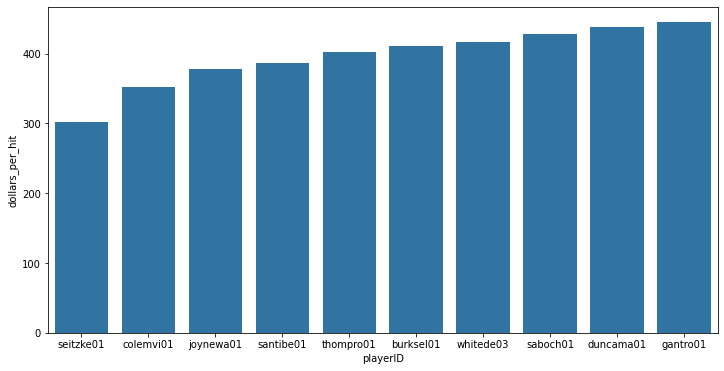

In [80]:
batting_salary['dollars_per_hit'] = batting_salary['salary'] / batting_salary['H']
batting_salary_filtered = batting_salary[(batting_salary['salary'] > 0) & (batting_salary['H'] > 0)]
batting_salary_sorted = batting_salary_filtered.sort_values(by='dollars_per_hit', ascending=True)
top_10_value_players = batting_salary_sorted.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='playerID', y='dollars_per_hit', data=top_10_value_players)
# top_10_value_players.salary


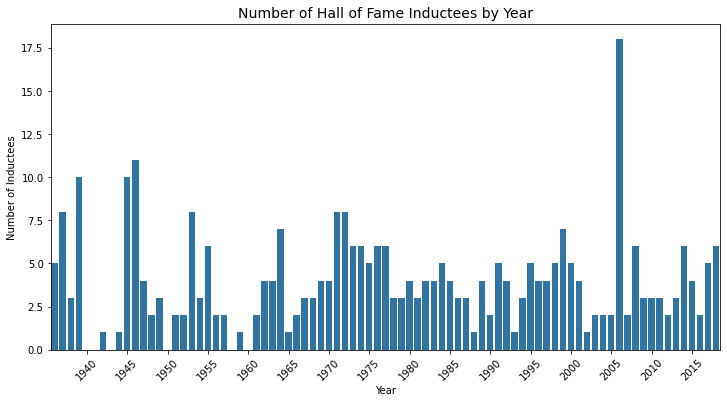

In [87]:
hof = pd.read_csv('HallOfFame.csv')
hof_inducted = hof[hof['inducted'] == 'Y']
hof_by_year = hof_inducted.groupby('yearid').size().reset_index(name='count')

min_year = hof_by_year['yearid'].min()
max_year = hof_by_year['yearid'].max()
all_years = pd.DataFrame({'yearid': range(min_year, max_year + 1)})
hof_by_year = pd.merge(all_years, hof_by_year, on='yearid', how='left').fillna(0)
hof_by_year['count'] = hof_by_year['count'].astype(int)
years_to_show = hof_by_year['yearid'][hof_by_year['yearid'] % 5 == 0]

plt.figure(figsize=(12, 6))
sns.barplot(x='yearid', y='count', data=hof_by_year)
plt.title('Number of Hall of Fame Inductees by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Inductees')
plt.xticks(ticks=hof_by_year[hof_by_year['yearid'].isin(years_to_show)].index, labels=years_to_show, rotation=45)
plt.show()
